In [1]:
import torch
import matplotlib.pyplot as plt
import time
import numpy as np

# JKO scheme for a two-typed crowd motion under congestion

Implementation of the adaptation of https://arxiv.org/abs/1502.06216 in the case of two species. We compute the gradient flow of densities $\rho_1,\rho_2$ subjected to $U_i = -\nabla D_i$, under the constraint $\rho_1+\rho_2 \leq 1$, with a JKO scheme.\\
Being given a timestep $\tau$, the JKO step writes
\begin{equation}
  \left\{
  \begin{array}{lcl}
  \displaystyle(\rho_1^{k,\tau},\rho_2^{k,\tau}) &\in& \underset{ \rho_1+\rho_2 \leq 1}{\text{argmin}}\, J\left(\rho_1,\rho_2\right)  + \displaystyle\frac{1}{2\tau}\left(W^2_2\left(\rho_1, \rho_1^{k-1,\tau}\right)+W^2_2\left(\rho_2, \rho_2^{k-1,\tau}\right)\right)\\
  \rho_1^{0,\tau},\rho_2^{0,\tau} &=& \rho_1^0,\rho_2^0.
  \end{array}
\right.
\end{equation}

where $J(\rho_1,\rho_2)= \int D_1\rho_1 + D_2\rho_2$ and $W_2$ is the 2-Wasserstein distance.



## I. JKO for one type
Let us start with one only type.

In [2]:
from JKO_1e import crowd_motion_JKO

## Parameters

N=50   # Meshsize
dt=.01 # timestep
nit=10 # Iteration number

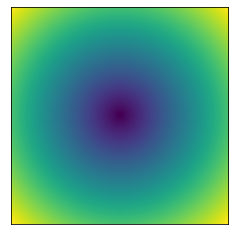

In [3]:
## Potential D

def g(x,y):
    return torch.sqrt((x-1/2)**2 + (y-1/2)**2)*10


def D(x):
    return g(x[:,0], x[:,1])


## Display

x = torch.linspace(0,1,100)
xx,yy = torch.meshgrid(x,x)
fig, ax1 = plt.subplots()
ax1.imshow(g(xx,yy), origin='lower', extent=[0,1,0,1])
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

In [4]:
## Initial condition
rho = torch.outer(torch.arange(0,N,1),torch.arange(0,N,1))+1
rho = rho/rho.max()

fig, ax1 = plt.subplots()
ax1.imshow(rho.detach().numpy(), vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

Iteration  0  over  10 , time:  0.17885160446166992
Iteration  1  over  10 , time:  0.17925190925598145
Iteration  2  over  10 , time:  0.1831204891204834
Iteration  3  over  10 , time:  0.1715400218963623
Iteration  4  over  10 , time:  0.18449687957763672
Iteration  5  over  10 , time:  0.197174072265625
Iteration  6  over  10 , time:  0.1867687702178955
Iteration  7  over  10 , time:  0.17399191856384277
Iteration  8  over  10 , time:  0.18934869766235352
Iteration  9  over  10 , time:  0.18439340591430664


Text(0.5, 1.0, 'time: 0.1')

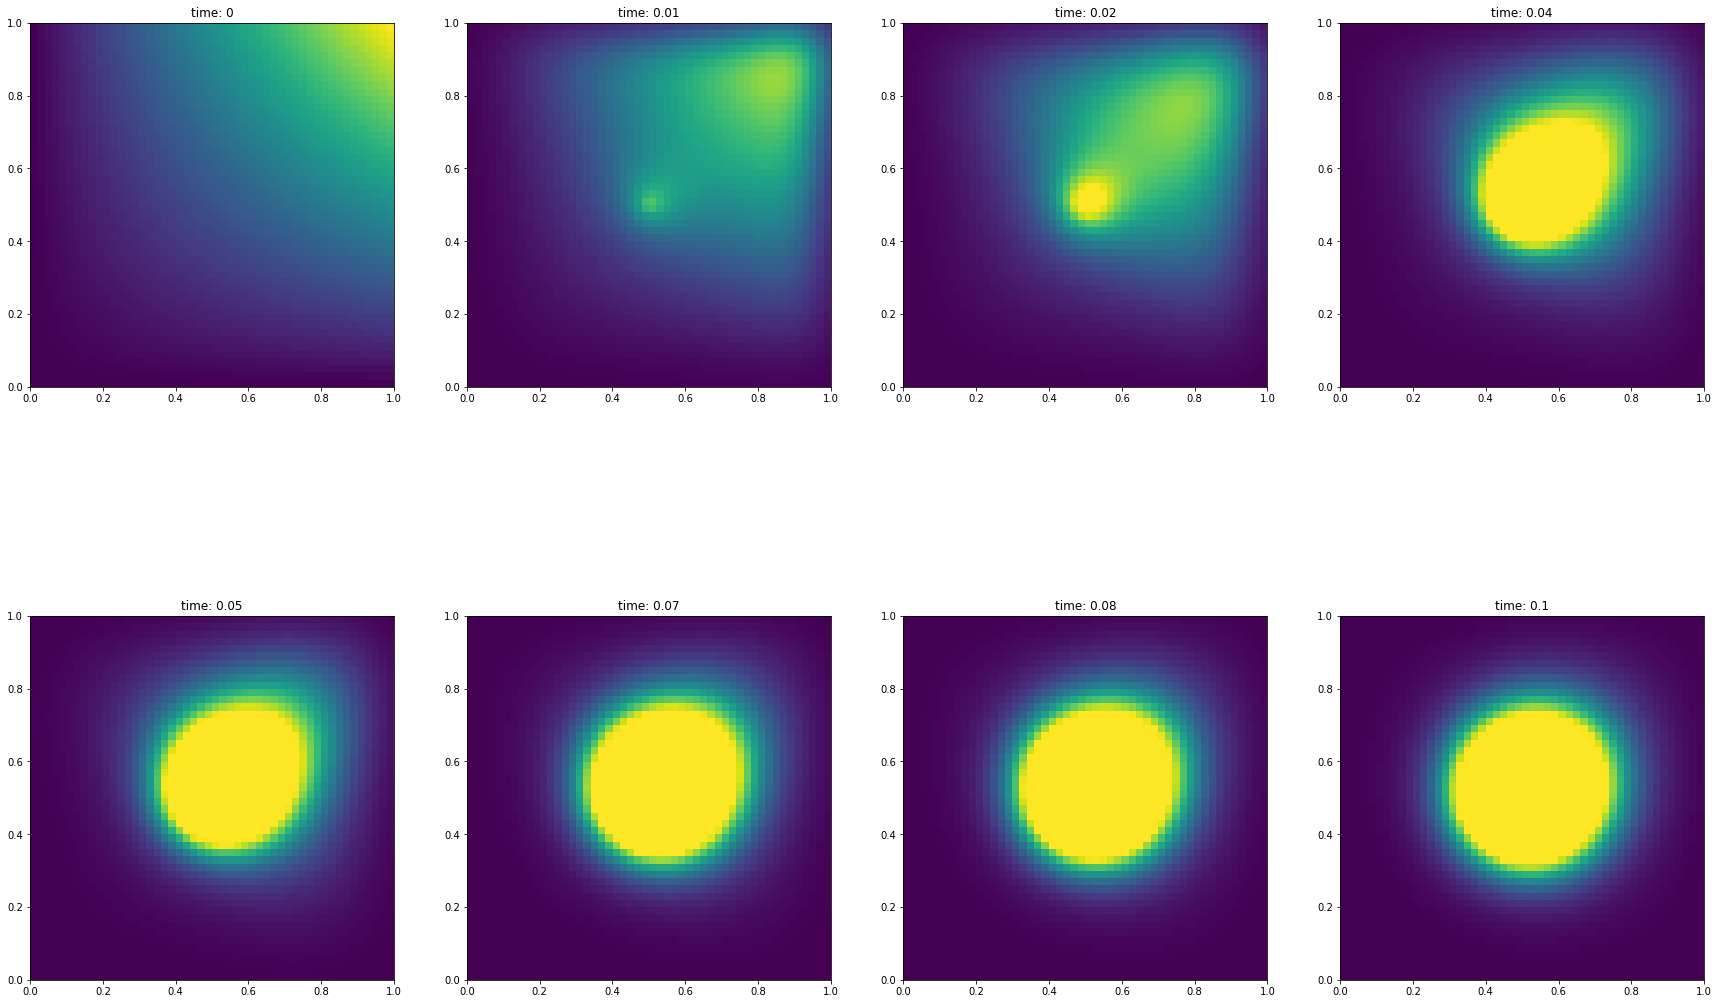

In [5]:
## Running the model

rho_hist = crowd_motion_JKO(dt,nit,rho,D,gamma=.01)

plt.figure(figsize=(30,20))
plt.subplot(241)
plt.imshow(rho_hist[:,:,0], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(0))
plt.subplot(242)
plt.imshow(rho_hist[:,:,int(nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(nit/7)*dt))
plt.subplot(243)
plt.imshow(rho_hist[:,:,int(2*nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(2*nit/7)*dt))
plt.subplot(244)
plt.imshow(rho_hist[:,:,int(3*nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(3*nit/7)*dt))
plt.subplot(245)
plt.imshow(rho_hist[:,:,int(4*nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(4*nit/7)*dt))
plt.subplot(246)
plt.imshow(rho_hist[:,:,int(5*nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(5*nit/7)*dt))
plt.subplot(247)
plt.imshow(rho_hist[:,:,int(6*nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(6*nit/7)*dt))
plt.subplot(248)
im =plt.imshow(rho_hist[:,:,int(7*nit/7)], vmin=0, vmax = 1, origin='lower', extent=[0,1,0,1])
plt.title('time: '+ str(int(7*nit/7)*dt))

## II. Two types

In [6]:
from JKO_2e import crowd_motion_JKO as crowd_motion_JKO_2e

## Simulation parameters

N=50
dt=.02
nit=10

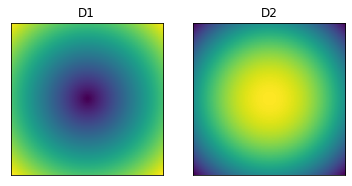

In [7]:
## Two Potentials, one attractive towards the center, one repulsive

def g1(x,y):
    return torch.sqrt(((x-1/2)**2 + (y-1/2)**2))*5


def g2(x,y):
    return -((x - 1 / 2) ** 2 + (y - 1 / 2) ** 2)*10


def D1(x):
    return g1(x[:,0], x[:,1])

def D2(x):
    return g2(x[:,0], x[:,1])

## Displays


x = torch.linspace(0,1,100)
xx,yy = torch.meshgrid(x,x)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(g1(xx,yy), origin='lower', extent=[0,1,0,1])
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.title.set_text('D1')
ax2.imshow(g2(xx,yy), origin='lower', extent=[0,1,0,1])
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.title.set_text('D2')

In [8]:
## Initial conditions (discs)

rho1 = torch.ones((N,N))*0.001
rho2 = torch.ones((N,N))*0.001

for i in range(N):
    for j in range(N):
        if (i/N-.5)**2 + (j/N-.5)**2 < .4**2:
            rho1[i,j] = .5
        if (i/N-.5)**2 + (j/N-.5)**2 < .4**2:
            rho2[i,j] = .5
            

## Displays

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(rho1, origin='lower', vmin=0, vmax=1,extent=[0,1,0,1])
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.title.set_text('rho1')

ax2.imshow(rho2, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.title.set_text('rho2')

ax3.imshow(rho1+rho2, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.title.set_text('rhotot')

In [9]:
## Run the model

rho_hist_tot = crowd_motion_JKO_2e(dt,nit,rho1,rho2,D1,D2,gamma=.01)

Iteration  0  over  10 , time:  0.3345160484313965 , sum 1 :  628.1635131835938 , sum 2 :  627.916748046875
Iteration  1  over  10 , time:  0.34121036529541016 , sum 1 :  627.8939819335938 , sum 2 :  627.8707275390625
Iteration  2  over  10 , time:  0.34266018867492676 , sum 1 :  627.269287109375 , sum 2 :  627.8258056640625
Iteration  3  over  10 , time:  0.3460860252380371 , sum 1 :  626.454833984375 , sum 2 :  628.6817626953125
Iteration  4  over  10 , time:  0.3431084156036377 , sum 1 :  625.5411376953125 , sum 2 :  635.721923828125
Iteration  5  over  10 , time:  0.37943577766418457 , sum 1 :  624.5847778320312 , sum 2 :  650.421142578125
Iteration  6  over  10 , time:  0.36268043518066406 , sum 1 :  623.606201171875 , sum 2 :  671.9359130859375
Iteration  7  over  10 , time:  0.3863823413848877 , sum 1 :  622.6209106445312 , sum 2 :  698.8204345703125
Iteration  8  over  10 , time:  0.43914055824279785 , sum 1 :  621.624755859375 , sum 2 :  730.1218872070312
Iteration  9  over  1

Text(0.5, 1.0, 'time: 0.2')

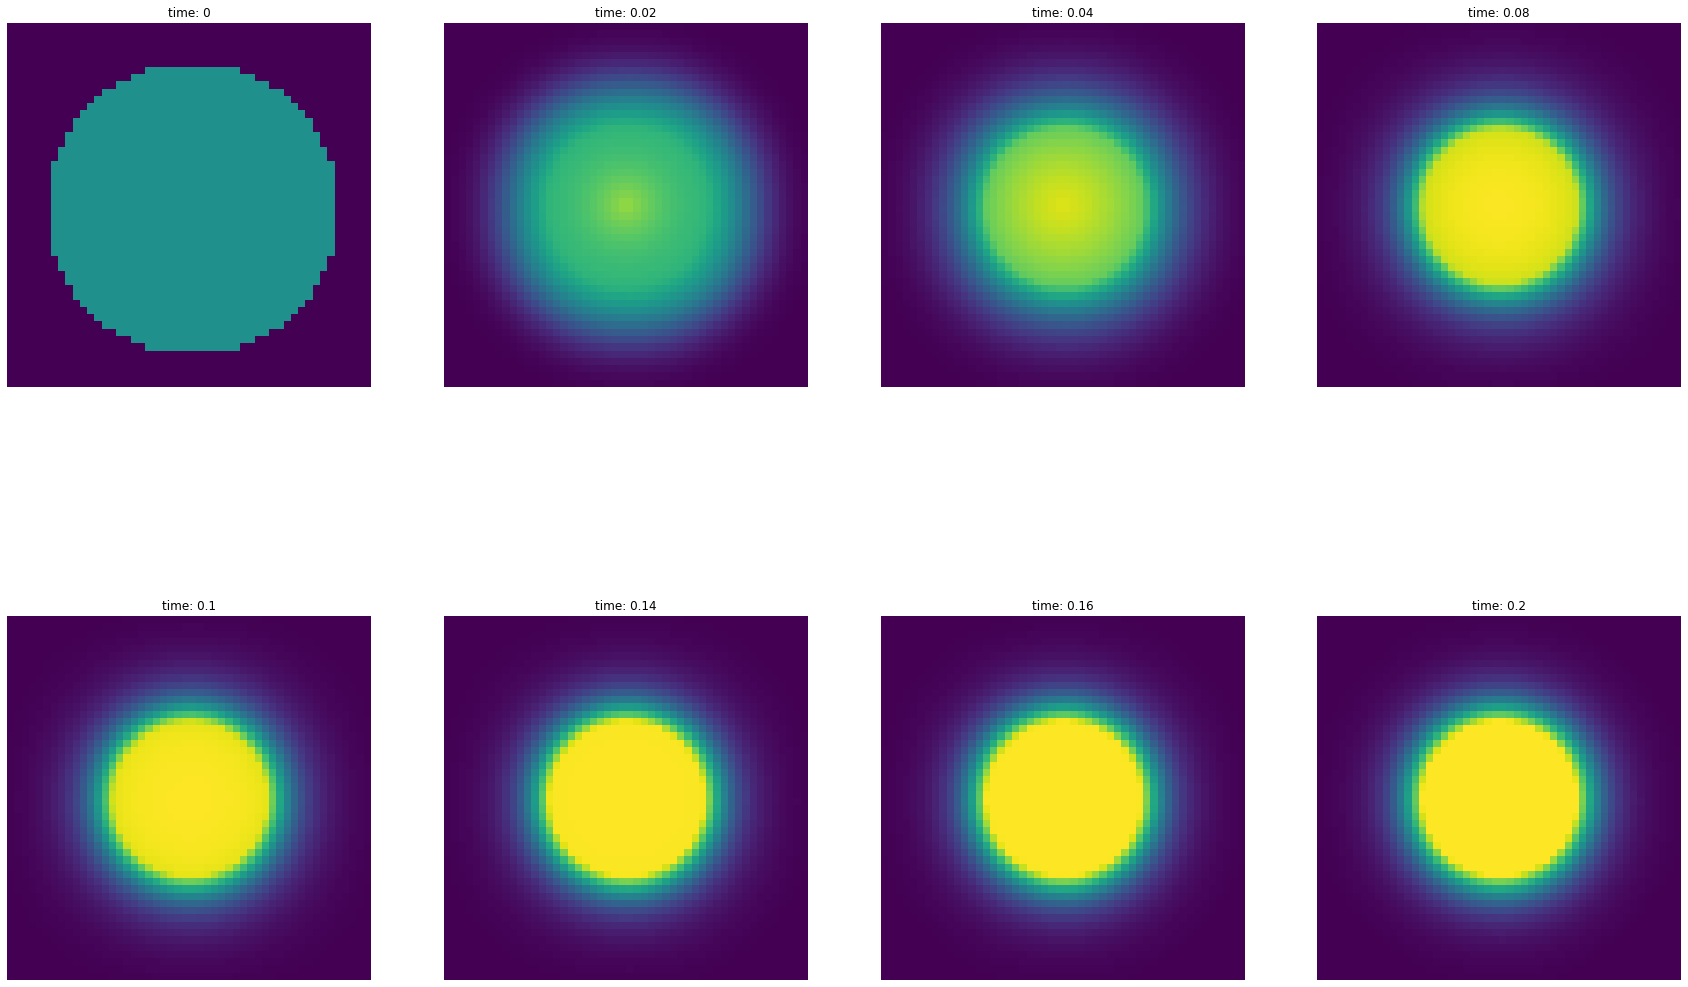

In [10]:
## Display results : rho1

rho_hist = rho_hist_tot[:,:,:,0]
plt.figure(figsize=(30, 20))
plt.subplot(241)
plt.axis('off')
plt.imshow(rho_hist[:, :, 0], vmin=0, vmax=1)
plt.title('time: ' + str(0))
plt.subplot(242)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(nit / 7) * dt))
plt.subplot(243)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(2 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(2 * nit / 7) * dt))
plt.subplot(244)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(3 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(3 * nit / 7) * dt))
plt.subplot(245)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(4 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(4 * nit / 7) * dt))
plt.subplot(246)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(5 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(5 * nit / 7) * dt))
plt.subplot(247)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(6 * nit / 7)], vmin=0, vmax=1)
plt.axis('off')
plt.title('time: ' + str(int(6 * nit / 7) * dt))
plt.subplot(248)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(7 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(7 * nit / 7) * dt))

In [11]:
## rho2

rho_hist = rho_hist_tot[:,:,:,1]
plt.figure(figsize=(30,20))
plt.suptitle("rho_2")
plt.subplot(241)
plt.axis('off')
plt.imshow(rho_hist[:,:,0], vmin=0, vmax=1)
plt.title('time: '+ str(0))
plt.subplot(242)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(nit/7)*dt))
plt.subplot(243)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(2*nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(2*nit/7)*dt))
plt.subplot(244)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(3*nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(3*nit/7)*dt))
plt.subplot(245)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(4*nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(4*nit/7)*dt))
plt.subplot(246)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(5*nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(5*nit/7)*dt))
plt.subplot(247)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(6*nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(6*nit/7)*dt))
plt.subplot(248)
plt.axis('off')
plt.imshow(rho_hist[:,:,int(7*nit/7)], vmin=0, vmax=1)
plt.title('time: '+ str(int(7*nit/7)*dt))

Text(0.5, 1.0, 'time: 0.2')

Text(0.5, 1.0, 'time: 0.2')

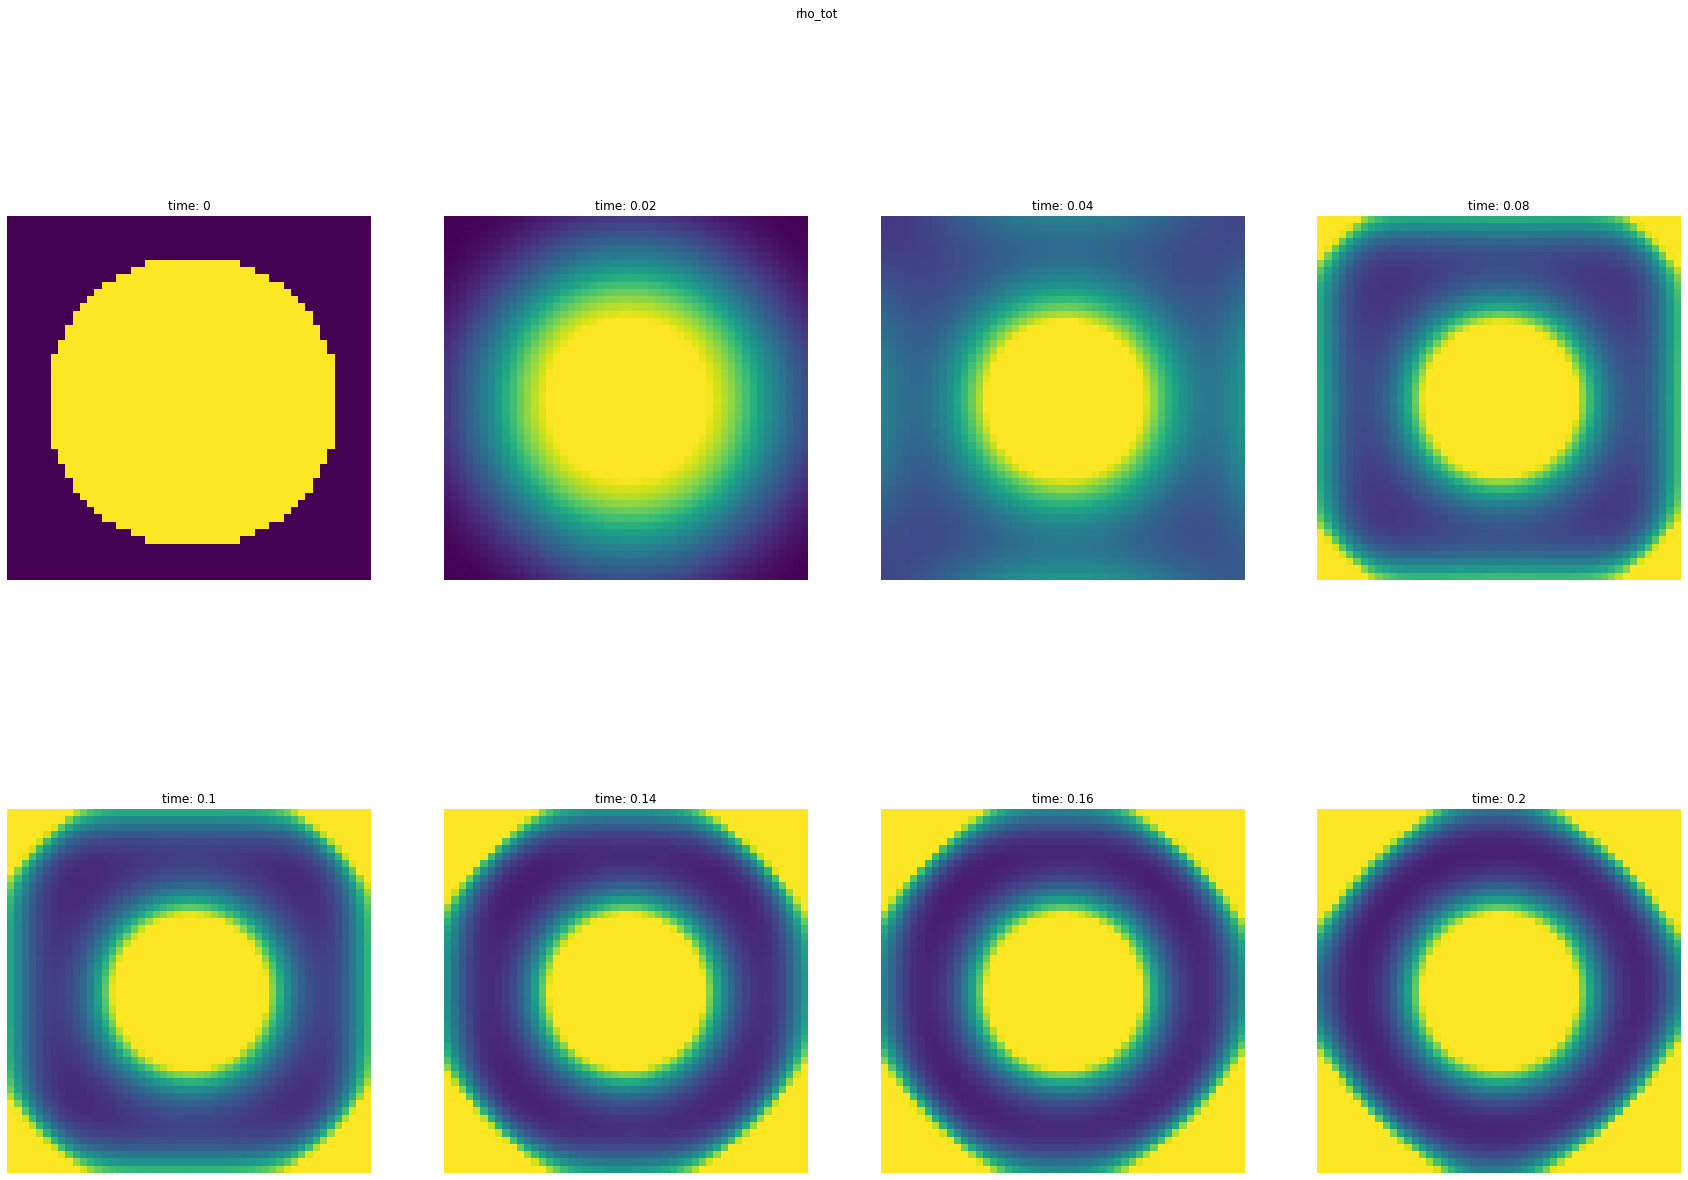

In [12]:
## rhotot


rho_hist = rho_hist_tot[:, :, :, 0]+rho_hist_tot[:, :, :, 1]
plt.figure(figsize=(30, 20))
plt.suptitle("rho_tot")
plt.subplot(241)
plt.axis('off')
plt.imshow(rho_hist[:, :, 0], vmin=0, vmax=1)
plt.title('time: ' + str(0))
plt.subplot(242)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(nit / 7) * dt))
plt.subplot(243)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(2 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(2 * nit / 7) * dt))
plt.subplot(244)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(3 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(3 * nit / 7) * dt))
plt.subplot(245)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(4 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(4 * nit / 7) * dt))
plt.subplot(246)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(5 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(5 * nit / 7) * dt))
plt.subplot(247)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(6 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(6 * nit / 7) * dt))
plt.subplot(248)
plt.axis('off')
plt.imshow(rho_hist[:, :, int(7 * nit / 7)], vmin=0, vmax=1)
plt.title('time: ' + str(int(7 * nit / 7) * dt))